## Data Preprocessing

In [ ]:
import pandas as pd

def read_csv(path):
    df = pd.read_csv(path,encoding='ISO-8859-9', sep=';')
    df.columns = df.columns.str.strip() #sütun isimlerinde boşluk varsa kaldırılır
    categorical_columns = df.select_dtypes(include=['object']).columns #kategorik sütunların seçimi
    for col in categorical_columns:
        df[col] = df[col].str.replace(' ', '') #değerlerde boşluk varsa siler
    return df
df=read_csv('./loan_approval_dataset_updated.csv')
df.head(5)

,loan_id,no_of_dependents,City,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Ankara,Graduate,No,9600000,29900000,12,778.0,2400000.0,17600000,22700000,8000000,Approved
1,2,0,Ankara,NotGraduate,Yes,4100000,12200000,8,417.0,2700000.0,2200000,8800000,3300000,Rejected
2,3,3,Ankara,Graduate,No,9100000,29700000,20,NaN,7100000.0,4500000,33300000,12800000,Rejected
3,4,3,Ankara,Graduate,No,8200000,30700000,8,NaN,18200000.0,3300000,23300000,7900000,Rejected
4,5,5,Ankara,NotGraduate,Yes,9800000,24200000,20,NaN,12400000.0,8200000,29400000,5000000,Rejected


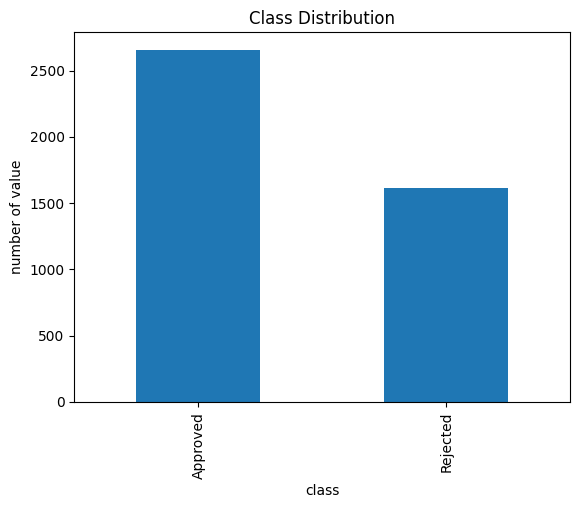

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

def number_of_class_values(df):
    class_counts = df['loan_status'].value_counts() # sınıflarsaki değerlerin sayılması gerçekleştirilir (dengesizlik var mı diye kontrol etmek için)
    class_counts.plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('class')
    plt.ylabel('number of value')
    plt.show() # grafiği çizdirilir
    print(class_counts)

number_of_class_values(df)

In [ ]:
def percentage_of_class_value(df):
    class_counts = df['loan_status'].value_counts() 
    total = class_counts.sum()
    class_percentages = (class_counts / total) * 100 #yüzdesel olarak fark hesaplanır 
    print(class_percentages)
    
percentage_of_class_value(df)

loan_status
Approved    62.215976
Rejected    37.784024
Name: count, dtype: float64


In [27]:
df.isnull().sum()

loan_id                       0
no_of_dependents              0
City                        156
education                    85
self_employed                 0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                 384
residential_assets_value    123
commercial_assets_value       0
luxury_assets_value           0
bank_asset_value              0
loan_status                   0
dtype: int64

In [28]:
df.dropna(axis=0, inplace=True) # boş olan satırlar silinir
# boş hücreleri doldurma işlemi çıktıyı etkileyebileceği için silme işlemi gerçekleştirildi.
# yüzdesel olarakta iki sınıf arasında bir fark olmadı, yani aradaki fark büyümedi
df.isnull().sum()

loan_id                     0
no_of_dependents            0
City                        0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [29]:
percentage_of_class_value(df)

loan_status
Approved    62.211593
Rejected    37.788407
Name: count, dtype: float64


## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encoding(df):
    le = LabelEncoder()
    df['City'] = le.fit_transform(df['City'])
    df['education'] = df['education'].map({'NotGraduate': 0, 'Graduate': 1})
    df['self_employed'] = df['self_employed'].map({'No': 0, 'Yes': 1})
    df['loan_status'] = df['loan_status'].map({'Rejected': 0, 'Approved': 1})  
    return df

df=encoding(df)

,loan_id,no_of_dependents,City,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,1,0,9600000,29900000,12,778.0,2400000.0,17600000,22700000,8000000,1
1,2,0,0,0,1,4100000,12200000,8,417.0,2700000.0,2200000,8800000,3300000,0
14,15,1,0,0,0,1900000,7400000,6,469.0,1900000.0,1200000,5900000,1900000,0
15,16,5,0,0,0,4700000,10700000,10,794.0,5700000.0,3900000,16400000,4400000,1
17,18,4,0,0,1,2900000,9400000,14,780.0,2900000.0,2800000,6700000,4300000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,4,1,1,1000000,2300000,12,317.0,2800000.0,500000,3300000,800000,0
4265,4266,0,4,0,1,3300000,11300000,20,559.0,4200000.0,2900000,11000000,1900000,1
4266,4267,2,4,0,0,6500000,23900000,18,457.0,1200000.0,12400000,18100000,7300000,0
4267,4268,1,4,0,0,4100000,12800000,8,780.0,8200000.0,700000,14100000,5800000,1


## Balanced with Data Augmentation

In [ ]:
# SMOTE (Azınlık sınıfı için yeni sentetik örnekler oluşturma)
from imblearn.over_sampling import SMOTE

def smote(df):
    X = df.drop('loan_status', axis=1)
    y = df['loan_status']
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='loan_status')], axis=1)
    print(df_smote['loan_status'].value_counts())
    return df_smote

df_balanced=smote(df)

loan_status
1    2211
0    2211
Name: count, dtype: int64


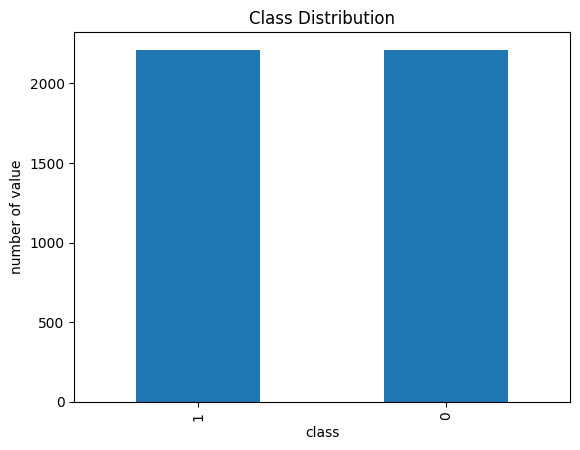

loan_status
1    2211
0    2211
Name: count, dtype: int64


In [33]:
number_of_class_values(df_balanced)

## Feature Selection

In [ ]:
#Chi-Square (Kategorik bir özelliğin, kategorik hedef değişken ile arasındaki ilişki)
import pandas as pd
from scipy.stats import chi2_contingency

contingency_city = pd.crosstab(df_balanced['City'], df_balanced['loan_status'])
contingency_education = pd.crosstab(df_balanced['education'], df['loan_status'])
contingency_self_employed = pd.crosstab(df_balanced['self_employed'], df_balanced['loan_status'])

# Ki-Kare testi uygulama
chi2_city, p_city, dof, expected = chi2_contingency(contingency_city)
chi2_education, p_education, dof, expected = chi2_contingency(contingency_education)
chi2_self_employed, p_self_employed, dof, expected = chi2_contingency(contingency_self_employed)

print("Ki-Kare Testi Sonuçları")
print("-----------------------")
print(f"chi2_city: {chi2_city},chi2_education,{chi2_education},chi2_self_employed,{chi2_self_employed}")
print(f"p_city: {p_city}, p_education:{p_education}, p_self_employed:{p_self_employed}")
#p değeri 0.05'den az ise anlamlı bir ilişki vardır

Ki-Kare Testi Sonuçları
-----------------------
chi2_city: 78.75699415368756,chi2_education,1.728541288522348,chi2_self_employed,46.992162790889516
p_city: 3.19364150628896e-16, p_education:0.1885972957318179, p_self_employed:7.127113193386354e-12


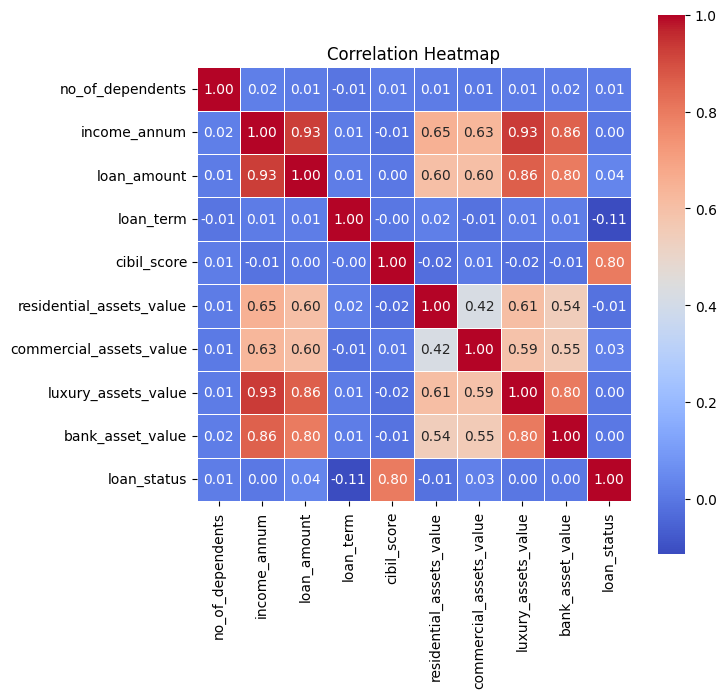

Features Selected by Correlation: ['cibil_score', 'loan_status']


c:\Users\10131286\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


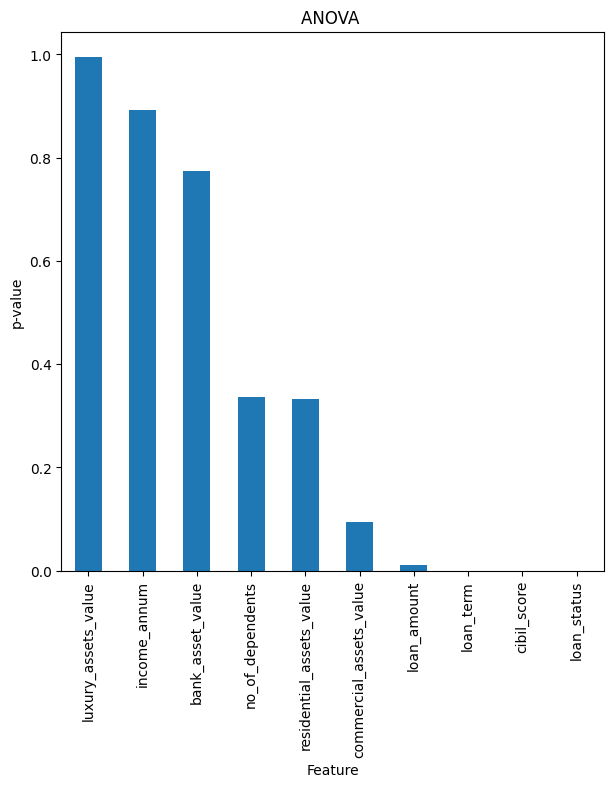

Features Selected by ANOVA ['loan_amount', 'loan_term', 'cibil_score', 'loan_status']


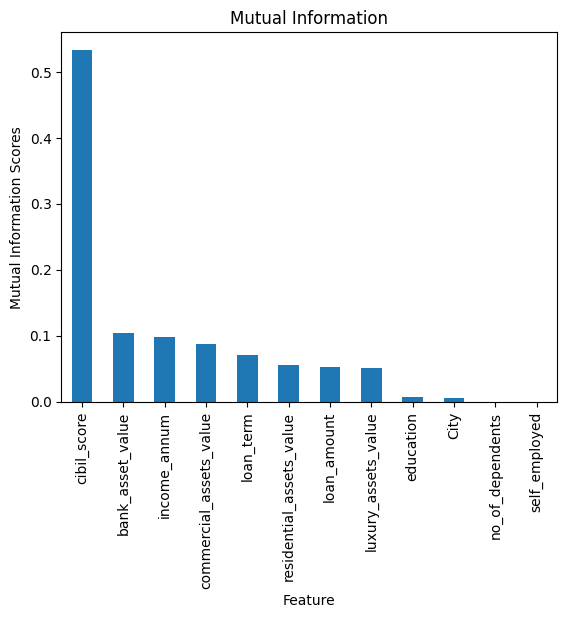

Features Selected by Mutual Informationa ['cibil_score', 'bank_asset_value', 'income_annum', 'commercial_assets_value', 'loan_term', 'residential_assets_value', 'loan_amount', 'luxury_assets_value']


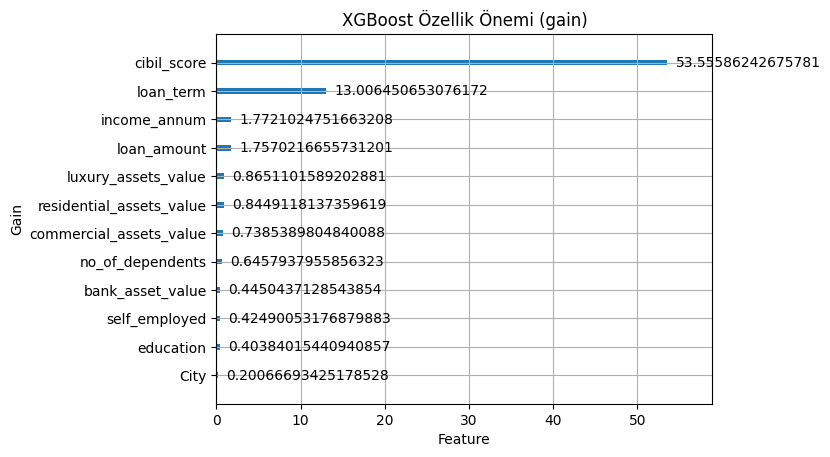

Features Selected by XGBoost with Feature Importance: ['cibil_score', 'loan_term', 'income_annum', 'loan_amount', 'luxury_assets_value', 'residential_assets_value']
------------------
Selected Features: ['loan_term', 'income_annum', 'cibil_score', 'luxury_assets_value', 'loan_amount', 'residential_assets_value']


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

def feature_selection(df_balanced):
    X = df_balanced.drop(columns=["loan_id", "loan_status"])  # loan_id'yi de çıkarıyoruz çünkü model için anlamlı değil, loan_status ise hedef değişken
    y=df_balanced["loan_status"]
    X_numerical = df_balanced.drop(columns= ["loan_id","City", "education", "self_employed"])

    # 1. Korelasyon Matrisi ile Özellik Seçimi (Sürekli bir özelliğin, kategorik hedef değişkenin arasındaki ilişki)
    correlation = X_numerical.corr()
    plt.figure(figsize=(7, 7))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.6, square=True)
    plt.title("Correlation Heatmap")
    plt.show()
    correlation_matrix = X_numerical.corrwith(y)
    correlation_matrix = X_numerical.corrwith(y).abs()
    correlation_features = correlation_matrix[correlation_matrix > 0.5].index.tolist()
    print("Features Selected by Correlation:", correlation_features)

    #2. ANOVA (Sürekli bir özelliğin, kategorik hedef değişkenin arasındaki ilişki)
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X_numerical, y)
    anova_scores = pd.Series(selector.pvalues_, index=X_numerical.columns).sort_values(ascending=False)
    anova_selected_features = anova_scores[anova_scores < 0.05].index.tolist()
    plt.figure(figsize=(7, 7))
    anova_scores.plot(kind="bar", title="ANOVA ")
    plt.xlabel("Feature")
    plt.ylabel("p-value")
    plt.show()
    print("Features Selected by ANOVA", anova_selected_features)

    # 3. Mutual Information ile Seçim (sürekli ve kategorik değerler ile kategorik hedef arasındaki ilişki)
    mi_scores = mutual_info_classif(X, y)
    mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
    mi_scores_series.plot(kind="bar", title="Mutual Information")
    plt.xlabel("Feature")
    plt.ylabel("Mutual Information Scores")
    plt.show()
    mutual_information = mi_scores_series[mi_scores_series > 0.05].index.tolist()  # 0.05 eşik değeri
    selected_X = X[mutual_information]
    print("Features Selected by Mutual Informationa", mutual_information)

    # 4. XGBoost ile Özellik Önem Skoru (sürekli ve kategorik değerler ile kategorik hedef arasındaki ilişki)
    model = xgb.XGBClassifier()
    model.fit(X, y)
    booster = model.get_booster()
    gain_importance = booster.get_score(importance_type="gain")
    gain_importance_series = pd.Series(gain_importance).sort_values(ascending=False)
    xgb.plot_importance(model, title="XGBoost Özellik Önemi (gain)", importance_type="gain")
    plt.xlabel("Feature")
    plt.ylabel("Gain")
    plt.show()

    top_50_percent_count = int(len(gain_importance_series) * 0.5)
    gain_selected_features = gain_importance_series.nlargest(top_50_percent_count).index.tolist()
    print("Features Selected by XGBoost with Feature Importance:", gain_selected_features)
    
    print("------------------")

    selected_features = list(set(mutual_information) & set(gain_selected_features))
    print("Selected Features:", selected_features)

    return selected_features

selected_features=feature_selection(df_balanced)

## Data Split

In [ ]:
from sklearn.model_selection import train_test_split

def data_split(selected_features):
    X_selected = df_balanced[selected_features]
    y_selected = df_balanced["loan_status"]
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_selected, y_selected, test_size=0.15, random_state=42, stratify=y_selected)
    return X_train_val, X_test, y_train_val, y_test  

X_train_val, X_test, y_train_val, y_test  =data_split(selected_features)  

## Train

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

def train():
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Stratified K-Fold çapraz doğrulama, Stratified sınıf oranını korur (genel datada  50-50 olduğu için burada da öyle)
    cv_scores = cross_val_score(xgb_model, X_train_val , y_train_val , cv=skf, scoring='accuracy')

    print("Cross-validation Accuracy Scores:", cv_scores)
    print("Mean Accuracy:", np.mean(cv_scores))
    print("Standard Deviation:", np.std(cv_scores))

    for train_index, test_index in skf.split(X_train_val, y_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[test_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[test_index]
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_val)

        print("Accuracy:", accuracy_score(y_val, y_pred))
        print(classification_report(y_val, y_pred))
        print(confusion_matrix(y_val, y_pred))

    return xgb_model, X_train, X_val, y_train, y_val

xgb_model, X_train, X_val, y_train, y_val=train()


Cross-validation Accuracy Scores: [0.98404255 0.99335106 0.99069149 0.98002663 0.9840213 ]
Mean Accuracy: 0.9864266084936396
Standard Deviation: 0.004869624325232388
Accuracy: 0.9840425531914894
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       376
           1       0.98      0.98      0.98       376

    accuracy                           0.98       752
   macro avg       0.98      0.98      0.98       752
weighted avg       0.98      0.98      0.98       752

[[370   6]
 [  6 370]]
Accuracy: 0.9933510638297872
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       376
           1       0.99      0.99      0.99       376

    accuracy                           0.99       752
   macro avg       0.99      0.99      0.99       752
weighted avg       0.99      0.99      0.99       752

[[373   3]
 [  2 374]]
Accuracy: 0.9906914893617021
              precision    recall  f1-score   s

In [ ]:
import pickle
with open("loan_model.pkl", "wb") as model_file: 
    pickle.dump(xgb_model, model_file) 

## Test

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def test():
    y_test_pred = xgb_model.predict(X_test)
    
    print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))
    print("\nClassification Report for Test Set:")
    print(classification_report(y_test, y_test_pred))
    print("\nConfusion Matrix for Test Set:")
    print(confusion_matrix(y_test, y_test_pred))
    return True
test()

Test Set Accuracy: 0.9849397590361446

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       332
           1       0.98      0.99      0.99       332

    accuracy                           0.98       664
   macro avg       0.99      0.98      0.98       664
weighted avg       0.99      0.98      0.98       664


Confusion Matrix for Test Set:
[[325   7]
 [  3 329]]


True

## Evaluation

In [3]:
import pandas as pd
import pickle


with open("loan_model.pkl", "rb") as model_file:
    xgb_model = pickle.load(model_file)

def evaluation(
    loan_term: int,
    income_annum: int,
    cibil_score: float,
    residential_assets_value: float,
    luxury_assets_value: float,
    loan_amount: float
):
    data = {
        'loan_term': [loan_term],
        'income_annum': [income_annum],
        'cibil_score': [cibil_score],  # Eğer test verisinde eksik varsa yinede sağlıklı çıktı üretilir çünkü XGBoost’un DMatrix veri yapısı eksik değerleri np.nan alır ve doğal olarak işleyebilir
        'luxury_assets_value': [luxury_assets_value],
        'loan_amount':[loan_amount],
        'residential_assets_value': [residential_assets_value],
    }
    input_data = pd.DataFrame(data)
    prediction = xgb_model.predict(input_data)
    result = "APPROVED" if prediction[0] == 1 else "REJECTED"
    print("Loan Status:", result)
    return result

evaluation(12,2000000,560,10000,1000000,50000)

Loan Status: APPROVED


'APPROVED'